In [63]:
import numpy as np
import pandas as pd
import tensorflow.keras as keras
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [14]:
import os
file_list = os.listdir('./training_data_new')

In [17]:
import random
random.shuffle(file_list)
file_list

['11179.csv',
 '11045.csv',
 '13067.csv',
 '12356.csv',
 '12895.csv',
 '14541.csv',
 '13296.csv',
 '18328.csv',
 '14864.csv',
 '13447.csv',
 '10398.csv',
 '1164.csv',
 '10895.csv',
 '17497.csv',
 '10974.csv',
 '11921.csv',
 '11069.csv',
 '1198.csv',
 '11547.csv',
 '1195.csv',
 '1077.csv',
 '12799.csv',
 '12818.csv',
 '13930.csv',
 '14783.csv',
 '13176.csv',
 '14399.csv',
 '14272.csv',
 '11054.csv',
 '12450.csv',
 '16955.csv',
 '13571.csv',
 '10733.csv',
 '10514.csv',
 '15221.csv',
 '16969.csv',
 '16798.csv',
 '15090.csv',
 '15995.csv',
 '15590.csv',
 '12850.csv',
 '14072.csv',
 '14896.csv',
 '16363.csv',
 '14814.csv',
 '10903.csv',
 '13877.csv',
 '12541.csv',
 '17986.csv',
 '15773.csv',
 '16017.csv',
 '1702.csv',
 '10465.csv',
 '17777.csv',
 '10892.csv',
 '17105.csv',
 '15526.csv',
 '14962.csv',
 '14125.csv',
 '15541.csv',
 '13595.csv',
 '16474.csv',
 '10838.csv',
 '16922.csv',
 '13741.csv',
 '16367.csv',
 '13125.csv',
 '14096.csv',
 '15057.csv',
 '1245.csv',
 '16825.csv',
 '13603.csv'

In [16]:
len(file_list)

9400

In [4]:
def create_dataset_train(list_of_files, time_steps, number_of_variables, prediction_steps , training_size=7000, variable_index = 0):
    X_train, y_train = np.zeros((training_size,time_steps,number_of_variables)), np.zeros((training_size,prediction_steps))
    for i in range(training_size):
        file= pd.read_csv("./training_data_new/"+list_of_files[i])
        X_train[i,:,:] = file.to_numpy()[:time_steps, :]
        y_train[i,:] = file.to_numpy()[-prediction_steps:,variable_index]
    return X_train, y_train

In [32]:
def create_dataset_train_xy(list_of_files, time_steps, number_of_variables, prediction_steps , training_size=7000):
    X_train, y_train = np.zeros((training_size,time_steps,number_of_variables)), np.zeros((training_size,prediction_steps*2))
    for i in range(training_size):
        file= pd.read_csv("./training_data_new/"+list_of_files[i])
        X_train[i,:,:] = file.to_numpy()[:time_steps, :]
        y_train[i,:] = np.hstack((file.to_numpy()[-prediction_steps:,0], file.to_numpy()[-prediction_steps:,1]))
    return X_train, y_train

In [5]:
def min_max_scaling(dataset, scaler=False):
    reshaped_dataset = dataset.reshape(dataset.shape[0]*dataset.shape[1], dataset.shape[2])
    scaler = scaler
    if scaler==False:
        scaler = MinMaxScaler()
        reshaped_dataset = scaler.fit_transform(reshaped_dataset)
    else:
        scaler = scaler
        reshaped_dataset = scaler.transform(reshaped_dataset)
    reshaped_dataset = reshaped_dataset.reshape(dataset.shape[0],dataset.shape[1], dataset.shape[2])    
    return reshaped_dataset, scaler

In [6]:
def create_dataset_valid(list_of_files, time_steps, number_of_variables, prediction_steps , valid_start=7000, valid_size=1000, variable_index = 0):
    X_train, y_train = np.zeros((valid_size,time_steps,number_of_variables)), np.zeros((valid_size,prediction_steps))
    for i in range(valid_size):
        file= pd.read_csv("./training_data_new/"+list_of_files[valid_start+i])
        X_train[i,:,:] = file.to_numpy()[:time_steps, :]
        y_train[i,:] = file.to_numpy()[-prediction_steps:,variable_index]
    return X_train, y_train

In [33]:
def create_dataset_valid_xy(list_of_files, time_steps, number_of_variables, prediction_steps , valid_start=7000, valid_size=1000):
    X_train, y_train = np.zeros((valid_size,time_steps,number_of_variables)), np.zeros((valid_size,prediction_steps*2))
    for i in range(valid_size):
        file= pd.read_csv("./training_data_new/"+list_of_files[valid_start+i])
        X_train[i,:,:] = file.to_numpy()[:time_steps, :]
        y_train[i,:] = np.hstack((file.to_numpy()[-prediction_steps:,0], file.to_numpy()[-prediction_steps:,1]))
    return X_train, y_train

In [7]:
def create_dataset_test(list_of_files, time_steps, number_of_variables, prediction_steps , test_start=8000, test_size=1400, variable_index = 0):
    X_train, y_train = np.zeros((test_size,time_steps,number_of_variables)), np.zeros((test_size,prediction_steps))
    for i in range(test_size):
        file= pd.read_csv("./training_data_new/"+list_of_files[test_start+i])
        X_train[i,:,:] = file.to_numpy()[:time_steps, :]
        y_train[i,:] = file.to_numpy()[-prediction_steps:,variable_index]
    return X_train, y_train

In [34]:
def create_dataset_test_xy(list_of_files, time_steps, number_of_variables, prediction_steps , test_start=8000, test_size=1400):
    X_train, y_train = np.zeros((test_size,time_steps,number_of_variables)), np.zeros((test_size,prediction_steps*2))
    for i in range(test_size):
        file= pd.read_csv("./training_data_new/"+list_of_files[test_start+i])
        X_train[i,:,:] = file.to_numpy()[:time_steps, :]
        y_train[i,:] = np.hstack((file.to_numpy()[-prediction_steps:,0], file.to_numpy()[-prediction_steps:,1]))
    return X_train, y_train

In [60]:

def rmse_single_model(model, X_test, y_test):
    xy_hat = model.predict(X_test)
    x_true = y_test[:,:5]
    y_true = y_test[:,5:]
    x_hat = xy_hat[:,:5]
    y_hat = xy_hat[:,5:]
    print(f"root mean squared error x: {mean_squared_error(x_true.flatten(), x_hat.flatten(), squared=False)}")
    print(f"root mean squared error y: {mean_squared_error(y_true.flatten(), y_hat.flatten(), squared=False)}")
    print(f"root mean squared error total: {mean_squared_error(y_xytest.flatten(), xy_hat.flatten(), squared=False)}")

In [72]:
def rmse_double_model(model_x, model_y, Xx_test, yx_test, Xy_test, yy_test):
    x_hat = model_x.predict(Xx_test)
    y_hat = model_y.predict(Xy_test)
    x_true = yx_test
    y_true = yy_test
    xy_true = np.hstack((yx_test,yy_test))
    xy_test = np.hstack((x_hat,y_hat))
    print(f"root mean squared error x: {mean_squared_error(x_true.flatten(), x_hat.flatten(), squared=False)}")
    print(f"root mean squared error y: {mean_squared_error(y_true.flatten(), y_hat.flatten(), squared=False)}")
    print(f"root mean squared error total: {mean_squared_error(xy_true.flatten(), xy_test.flatten(), squared=False)}")

In [18]:
# variable definition
file = pd.read_csv("./training_data_new/"+file_list[0])
predict_steps = 5
time_steps = file.to_numpy().shape[0] - predict_steps
number_of_variables = file.to_numpy().shape[1]

In [12]:
file.to_numpy().shape[1]

12

In [19]:
X_xtrain, y_xtrain = create_dataset_train(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=0)
X_xvalid, y_xvalid = create_dataset_valid(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=0)
X_xtest, y_xtest = create_dataset_test(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=0)

In [69]:
X_xytrain, y_xytrain = create_dataset_train_xy(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps)
X_xyvalid, y_xyvalid = create_dataset_valid_xy(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps)
X_xytest, y_xytest = create_dataset_test_xy(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps)

In [20]:
model_x = keras.models.Sequential([
    keras.layers.LSTM(units=70, input_shape=[62,12], return_sequences=True),
    keras.layers.LSTM(units=70),
    keras.layers.Dense(units=5,activation='linear')
])
model_x.compile(optimizer='adam', loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_x = model_x.fit(X_xtrain, y_xtrain, epochs=10, validation_data=(X_xvalid, y_xvalid))

Epoch 1/10
219/219 [==============================] - 11s 41ms/step - loss: 1218.9084 - mse: 1218.9084 - val_loss: 842.7587 - val_mse: 842.7587
Epoch 2/10
219/219 [==============================] - 10s 44ms/step - loss: 649.0312 - mse: 649.0312 - val_loss: 533.4802 - val_mse: 533.4802
Epoch 3/10
219/219 [==============================] - 9s 43ms/step - loss: 472.0012 - mse: 472.0012 - val_loss: 359.4088 - val_mse: 359.4088
Epoch 4/10
219/219 [==============================] - 10s 44ms/step - loss: 377.9980 - mse: 377.9980 - val_loss: 282.1730 - val_mse: 282.1730
Epoch 5/10
219/219 [==============================] - 9s 43ms/step - loss: 328.7983 - mse: 328.7983 - val_loss: 268.9674 - val_mse: 268.9674
Epoch 6/10
219/219 [==============================] - 9s 42ms/step - loss: 204.6503 - mse: 204.6503 - val_loss: 111.2027 - val_mse: 111.2027
Epoch 7/10
219/219 [==============================] - 9s 41ms/step - loss: 126.5815 - mse: 126.5815 - val_loss: 277.2411 - val_mse: 277.2411
Epoch 8/

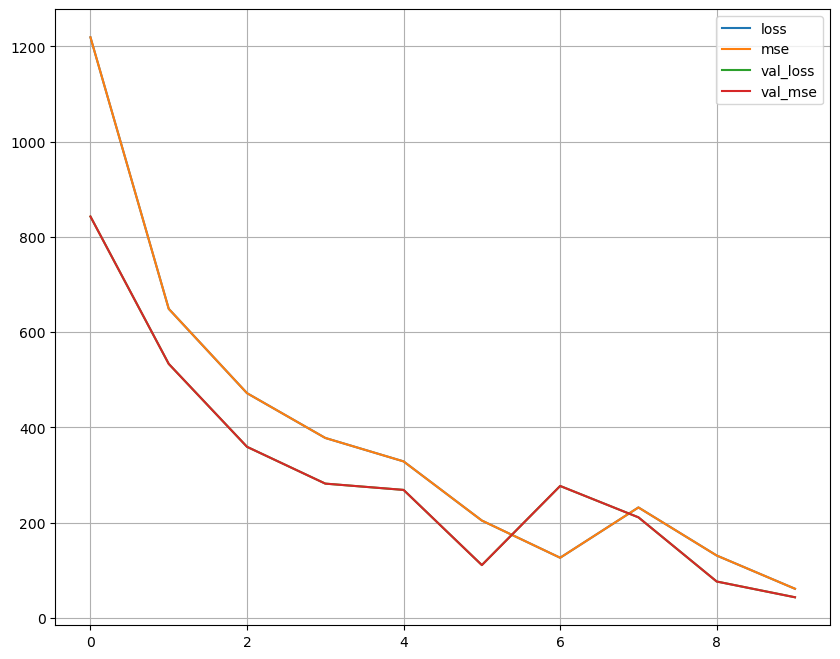

In [21]:
pd.DataFrame(history_x.history).plot(figsize=(10,8))
plt.grid(True)

In [37]:
model_xy = keras.models.Sequential([
    keras.layers.LSTM(units=70, input_shape=[62,12], return_sequences=True),
    keras.layers.LSTM(units=70),
    keras.layers.Dense(units=10,activation='linear')
])
model_xy.compile(optimizer='adam', loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_xy = model_xy.fit(X_xytrain, y_xytrain, epochs=10, validation_data=(X_xyvalid, y_xyvalid))

Epoch 1/10
219/219 [==============================] - 12s 43ms/step - loss: 478672.2500 - mse: 478672.2500 - val_loss: 472420.0000 - val_mse: 472420.0000
Epoch 2/10
219/219 [==============================] - 9s 39ms/step - loss: 463336.3438 - mse: 463336.3438 - val_loss: 458303.0312 - val_mse: 458303.0312
Epoch 3/10
219/219 [==============================] - 8s 39ms/step - loss: 449675.3438 - mse: 449675.3438 - val_loss: 444979.8438 - val_mse: 444979.8438
Epoch 4/10
219/219 [==============================] - 9s 39ms/step - loss: 436606.7500 - mse: 436606.7500 - val_loss: 432108.8750 - val_mse: 432108.8750
Epoch 5/10
219/219 [==============================] - 8s 39ms/step - loss: 423969.3750 - mse: 423969.3750 - val_loss: 419645.8750 - val_mse: 419645.8750
Epoch 6/10
219/219 [==============================] - 8s 39ms/step - loss: 411692.2500 - mse: 411692.2500 - val_loss: 407517.3750 - val_mse: 407517.3750
Epoch 7/10
219/219 [==============================] - 8s 39ms/step - loss: 399742

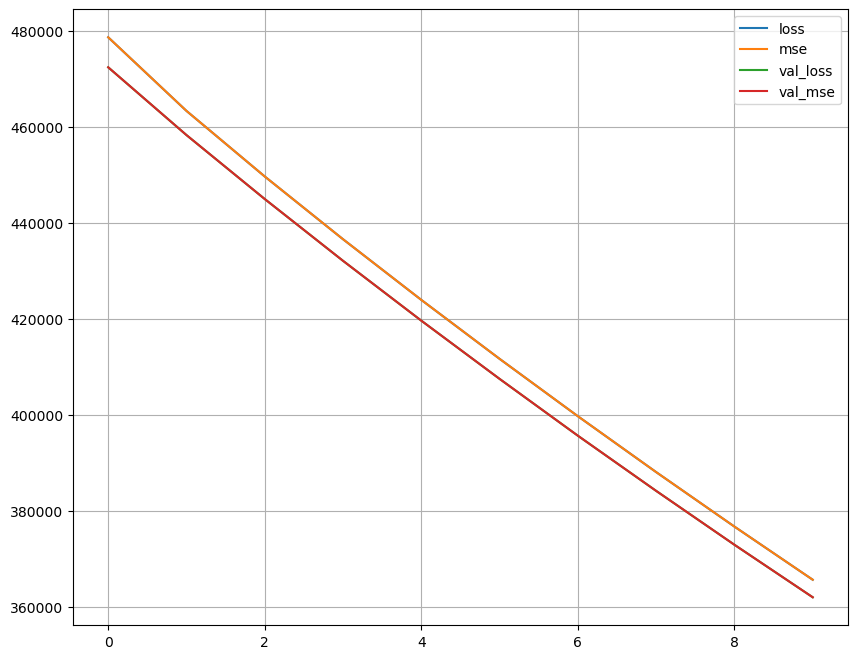

In [38]:
pd.DataFrame(history_xy.history).plot(figsize=(10,8))
plt.grid(True)

In [39]:
model_xy = keras.models.Sequential([
    keras.layers.LSTM(units=1000, input_shape=[62,12]),
    keras.layers.Dense(units=10,activation='linear')
])
model_xy.compile(optimizer='adam', loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_xy = model_xy.fit(X_xytrain, y_xytrain, epochs=10, validation_data=(X_xyvalid, y_xyvalid))

Epoch 1/10
219/219 [==============================] - 50s 221ms/step - loss: 412231.3125 - mse: 412231.3125 - val_loss: 345441.0312 - val_mse: 345441.0312
Epoch 2/10
219/219 [==============================] - 49s 225ms/step - loss: 291103.5938 - mse: 291103.5938 - val_loss: 245394.1562 - val_mse: 245394.1562
Epoch 3/10
219/219 [==============================] - 48s 218ms/step - loss: 206751.9844 - mse: 206751.9844 - val_loss: 174508.8125 - val_mse: 174508.8125
Epoch 4/10
219/219 [==============================] - 48s 218ms/step - loss: 147424.4531 - mse: 147424.4531 - val_loss: 123351.9766 - val_mse: 123351.9766
Epoch 5/10
219/219 [==============================] - 47s 216ms/step - loss: 102648.8125 - mse: 102648.8125 - val_loss: 85844.7656 - val_mse: 85844.7656
Epoch 6/10
219/219 [==============================] - 48s 219ms/step - loss: 71439.6016 - mse: 71439.6016 - val_loss: 58516.5469 - val_mse: 58516.5469
Epoch 7/10
219/219 [==============================] - 47s 216ms/step - loss:

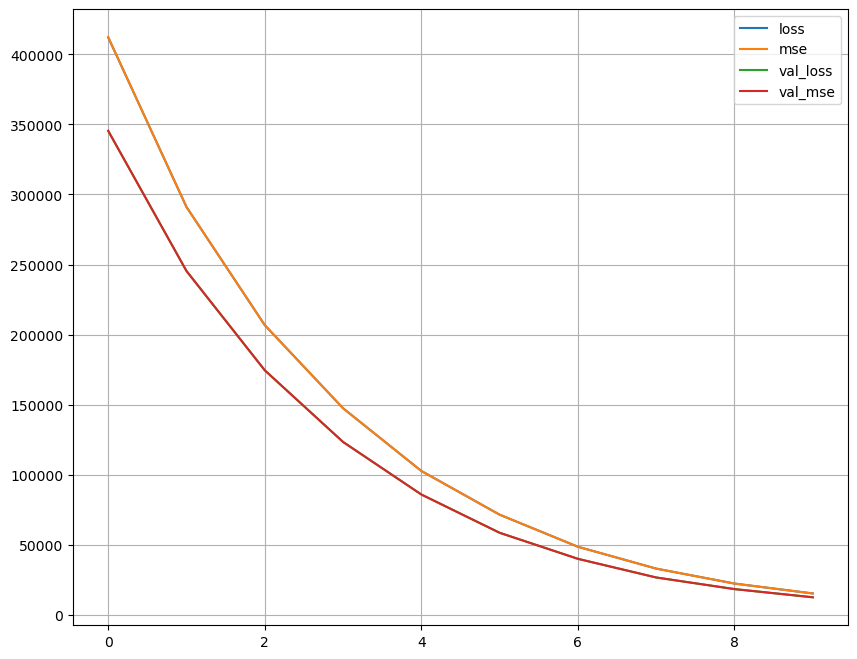

In [40]:
pd.DataFrame(history_xy.history).plot(figsize=(10,8))
plt.grid(True)

In [41]:
model_xy = keras.models.Sequential([
    keras.layers.LSTM(units=1000, input_shape=[62,12]),
    keras.layers.Dense(units=10,activation='linear')
])
model_xy.compile(optimizer='adam', loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_xy = model_xy.fit(X_xytrain, y_xytrain, epochs=25, validation_data=(X_xyvalid, y_xyvalid))


Epoch 1/25
219/219 [==============================] - 49s 220ms/step - loss: 411352.3125 - mse: 411352.3125 - val_loss: 344895.0000 - val_mse: 344895.0000
Epoch 2/25
219/219 [==============================] - 48s 219ms/step - loss: 291439.3125 - mse: 291439.3125 - val_loss: 246532.1875 - val_mse: 246532.1875
Epoch 3/25
219/219 [==============================] - 49s 222ms/step - loss: 208342.5469 - mse: 208342.5469 - val_loss: 175814.9531 - val_mse: 175814.9531
Epoch 4/25
219/219 [==============================] - 49s 225ms/step - loss: 148244.0938 - mse: 148244.0938 - val_loss: 124308.1406 - val_mse: 124308.1406
Epoch 5/25
219/219 [==============================] - 48s 221ms/step - loss: 103862.4297 - mse: 103862.4297 - val_loss: 86220.6016 - val_mse: 86220.6016
Epoch 6/25
219/219 [==============================] - 49s 223ms/step - loss: 71682.7031 - mse: 71682.7031 - val_loss: 58953.4648 - val_mse: 58953.4648
Epoch 7/25
219/219 [==============================] - 50s 228ms/step - loss:

In [ ]:
pd.DataFrame(history_xy.history).plot(figsize=(10,8))
plt.grid(True)

In [79]:
model_xy_2l = keras.models.Sequential([
    keras.layers.LSTM(units=1000, input_shape=[62,12], return_sequences= True),
    keras.layers.LSTM(100),
    keras.layers.Dense(units=10,activation='linear')
])
model_xy_2l.compile(optimizer='adam', loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_xy_2l = model_xy_2l.fit(X_xytrain, y_xytrain, epochs=25, validation_data=(X_xyvalid, y_xyvalid))

Epoch 1/25
219/219 [==============================] - 59s 260ms/step - loss: 475075.7812 - mse: 475075.7812 - val_loss: 466806.4375 - val_mse: 466806.4375
Epoch 2/25
219/219 [==============================] - 57s 262ms/step - loss: 455256.9375 - mse: 455256.9375 - val_loss: 447628.7188 - val_mse: 447628.7188
Epoch 3/25
219/219 [==============================] - 56s 257ms/step - loss: 436531.0312 - mse: 436531.0312 - val_loss: 429345.0312 - val_mse: 429345.0312
Epoch 4/25
219/219 [==============================] - 57s 258ms/step - loss: 418690.3125 - mse: 418690.3125 - val_loss: 411865.1562 - val_mse: 411865.1562
Epoch 5/25
219/219 [==============================] - 57s 259ms/step - loss: 401576.1250 - mse: 401576.1250 - val_loss: 395075.4375 - val_mse: 395075.4375
Epoch 6/25
219/219 [==============================] - 57s 259ms/step - loss: 385100.0312 - mse: 385100.0312 - val_loss: 378856.9062 - val_mse: 378856.9062
Epoch 7/25
219/219 [==============================] - 57s 259ms/step -

In [80]:
model_xy_gru = keras.models.Sequential([
    keras.layers.GRU(units=1000, input_shape=[62,12]),
    keras.layers.Dense(units=10,activation='linear')
])
model_xy_gru.compile(optimizer='adam', loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_xy_gru = model_xy_gru.fit(X_xytrain, y_xytrain, epochs=25, validation_data=(X_xyvalid, y_xyvalid))

Epoch 1/25
219/219 [==============================] - 34s 150ms/step - loss: 401671.3125 - mse: 401671.3125 - val_loss: 326204.7188 - val_mse: 326204.7188
Epoch 2/25
219/219 [==============================] - 32s 147ms/step - loss: 266727.1875 - mse: 266727.1875 - val_loss: 216126.3906 - val_mse: 216126.3906
Epoch 3/25
219/219 [==============================] - 32s 147ms/step - loss: 175153.7812 - mse: 175153.7812 - val_loss: 141177.2812 - val_mse: 141177.2812
Epoch 4/25
219/219 [==============================] - 32s 145ms/step - loss: 115174.5703 - mse: 115174.5703 - val_loss: 93198.6562 - val_mse: 93198.6562
Epoch 5/25
219/219 [==============================] - 32s 145ms/step - loss: 76698.9609 - mse: 76698.9609 - val_loss: 62333.1602 - val_mse: 62333.1602
Epoch 6/25
219/219 [==============================] - 32s 148ms/step - loss: 51431.7695 - mse: 51431.7695 - val_loss: 41853.4453 - val_mse: 41853.4453
Epoch 7/25
219/219 [==============================] - 34s 155ms/step - loss: 347

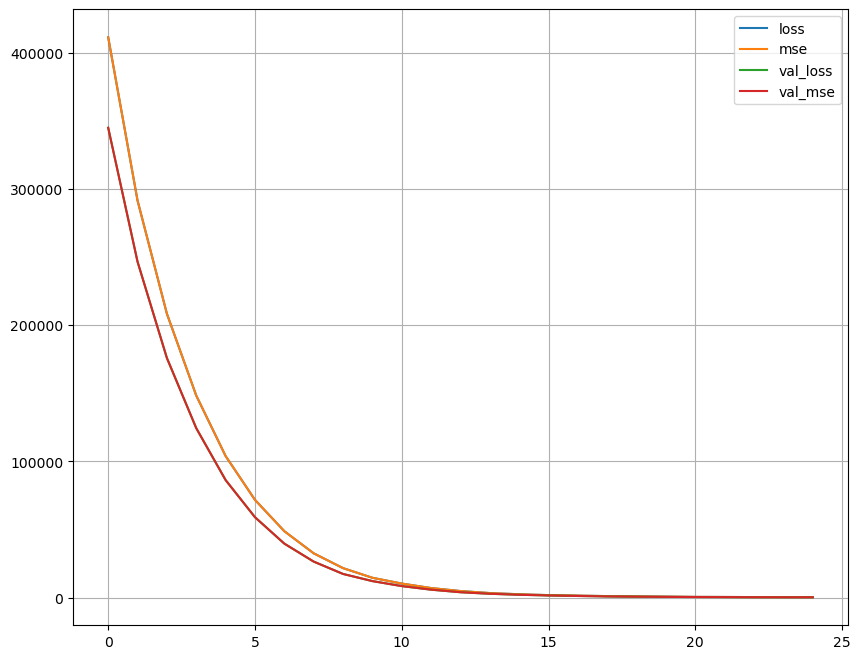

In [42]:
pd.DataFrame(history_xy_2l.history).plot(figsize=(10,8))
plt.grid(True)

In [64]:
model_x = keras.models.Sequential([
    keras.layers.LSTM(units=1000, input_shape=[62,12]),
    keras.layers.Dense(units=5,activation='linear')
])
model_x.compile(optimizer='adam', loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_x = model_x.fit(X_xtrain, y_xtrain, epochs=10, validation_data=(X_xvalid, y_xvalid))

Epoch 1/10
219/219 [==============================] - 50s 225ms/step - loss: 458.9421 - mse: 458.9421 - val_loss: 150.9200 - val_mse: 150.9200
Epoch 2/10
219/219 [==============================] - 49s 223ms/step - loss: 50.0227 - mse: 50.0227 - val_loss: 8.8819 - val_mse: 8.8819
Epoch 3/10
219/219 [==============================] - 49s 223ms/step - loss: 5.8544 - mse: 5.8544 - val_loss: 2.3360 - val_mse: 2.3360
Epoch 4/10
219/219 [==============================] - 49s 223ms/step - loss: 2.1435 - mse: 2.1435 - val_loss: 1.0276 - val_mse: 1.0276
Epoch 5/10
219/219 [==============================] - 49s 224ms/step - loss: 1.4387 - mse: 1.4387 - val_loss: 0.9083 - val_mse: 0.9083
Epoch 6/10
219/219 [==============================] - 49s 225ms/step - loss: 0.7381 - mse: 0.7381 - val_loss: 0.5272 - val_mse: 0.5272
Epoch 7/10
219/219 [==============================] - 49s 224ms/step - loss: 0.6274 - mse: 0.6274 - val_loss: 0.3017 - val_mse: 0.3017
Epoch 8/10
219/219 [=========================

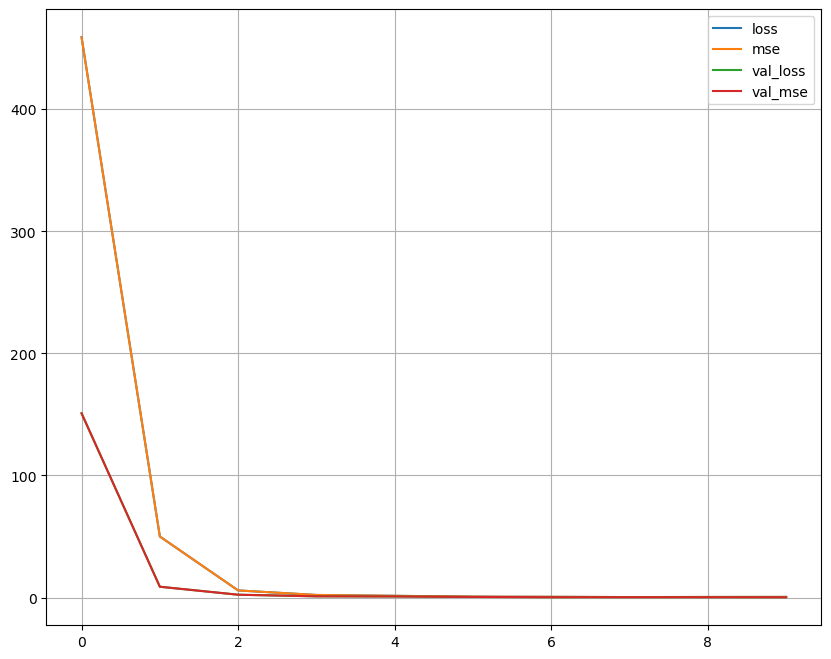

In [65]:
pd.DataFrame(history_x.history).plot(figsize=(10,8))
plt.grid(True)

In [67]:
X_ytrain, y_ytrain = create_dataset_train(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=1)
X_train_scaled, scaler = min_max_scaling(X_ytrain)
X_yvalid, y_yvalid = create_dataset_valid(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=1)
X_yvalid_scaled,_ = min_max_scaling(X_yvalid, scaler)
X_ytest, y_ytest = create_dataset_test(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=1)
X_ytest_scaled,_ = min_max_scaling(X_yvalid, scaler)

In [18]:
model_y = keras.models.Sequential([
    keras.layers.LSTM(units=70, input_shape=[62,12], return_sequences=True),
    keras.layers.LSTM(units=70),
    keras.layers.Dense(units=5,activation='linear')
])
model_y.compile(optimizer='adam', loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_y = model_y.fit(X_ytrain, y_ytrain, epochs=10, validation_data=(X_yvalid, y_yvalid))

Epoch 1/10
219/219 [==============================] - 11s 42ms/step - loss: 958347.0000 - mse: 958347.0000 - val_loss: 983782.0625 - val_mse: 983782.0625
Epoch 2/10
219/219 [==============================] - 9s 40ms/step - loss: 928306.6250 - mse: 928306.6250 - val_loss: 955085.7500 - val_mse: 955085.7500
Epoch 3/10
219/219 [==============================] - 9s 40ms/step - loss: 901234.5625 - mse: 901234.5625 - val_loss: 927712.0625 - val_mse: 927712.0625
Epoch 4/10
219/219 [==============================] - 9s 40ms/step - loss: 875192.0000 - mse: 875192.0000 - val_loss: 901225.5625 - val_mse: 901225.5625
Epoch 5/10
219/219 [==============================] - 9s 41ms/step - loss: 849973.0000 - mse: 849973.0000 - val_loss: 875544.5000 - val_mse: 875544.5000
Epoch 6/10
219/219 [==============================] - 9s 40ms/step - loss: 825473.3750 - mse: 825473.3750 - val_loss: 850472.6875 - val_mse: 850472.6875
Epoch 7/10
219/219 [==============================] - 9s 40ms/step - loss: 801600

In [110]:
model_y_scaled = keras.models.Sequential([
    keras.layers.LSTM(units=70, input_shape=[62,12], return_sequences=True),
    keras.layers.LSTM(units=70),
    keras.layers.Dense(units=5,activation='linear')
])
model_y_scaled.compile(optimizer='adam', loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_y_scaled = model_y_scaled.fit(X_train_scaled, y_ytrain, epochs=40, validation_data=(X_yvalid_scaled, y_yvalid))

Epoch 1/40
219/219 [==============================] - 22s 59ms/step - loss: 957184.5625 - mse: 957184.5625 - val_loss: 983106.9375 - val_mse: 983106.9375
Epoch 2/40
219/219 [==============================] - 11s 49ms/step - loss: 927906.6875 - mse: 927906.6875 - val_loss: 954839.6875 - val_mse: 954839.6875
Epoch 3/40
219/219 [==============================] - 10s 47ms/step - loss: 901093.2500 - mse: 901093.2500 - val_loss: 927628.2500 - val_mse: 927628.2500
Epoch 4/40
219/219 [==============================] - 10s 47ms/step - loss: 875164.6250 - mse: 875164.6250 - val_loss: 901275.4375 - val_mse: 901275.4375
Epoch 5/40
219/219 [==============================] - 10s 46ms/step - loss: 850009.5000 - mse: 850009.5000 - val_loss: 875592.7500 - val_mse: 875592.7500
Epoch 6/40
219/219 [==============================] - 10s 47ms/step - loss: 825535.3125 - mse: 825535.3125 - val_loss: 850579.2500 - val_mse: 850579.2500
Epoch 7/40
219/219 [==============================] - 10s 48ms/step - loss: 

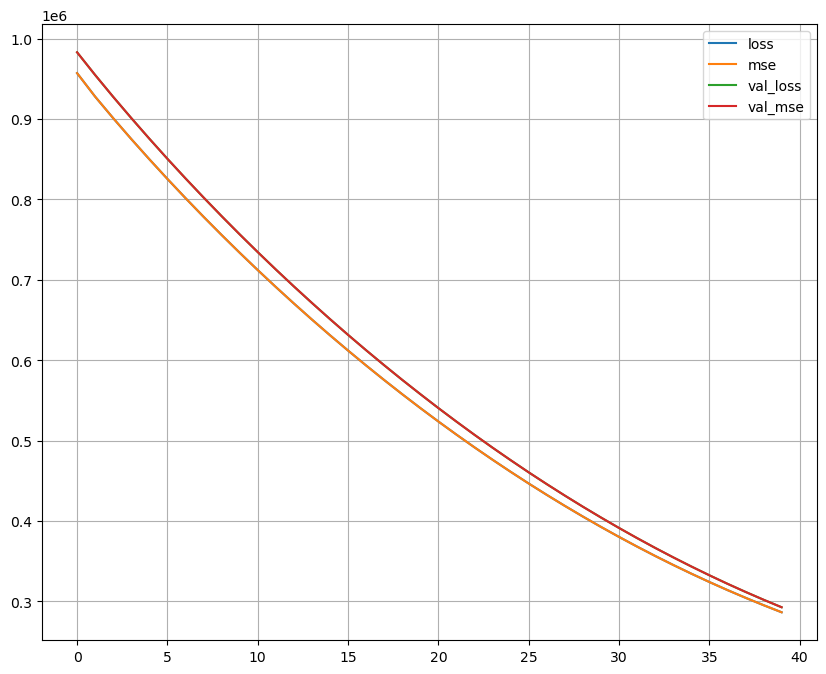

In [111]:
pd.DataFrame(history_y_scaled.history).plot(figsize=(10,8))
plt.grid(True)

In [87]:
model_y_scaled = keras.models.Sequential([
    keras.layers.LSTM(units=1000, input_shape=[62,12]),
    keras.layers.Dense(5, activation='linear')
])

In [30]:
model_y_scaled.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 1000)              4052000   
                                                                 
 dense_5 (Dense)             (None, 5)                 5005      
                                                                 
Total params: 4,057,005
Trainable params: 4,057,005
Non-trainable params: 0
_________________________________________________________________


In [89]:
model_y_scaled.compile(optimizer=keras.optimizers.Adam(), loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_y= model_y_scaled.fit(X_train_scaled, y_ytrain, epochs=25 , validation_data=(X_yvalid_scaled, y_yvalid))

Epoch 1/25
219/219 [==============================] - 50s 223ms/step - loss: 790453.1250 - mse: 790453.1250 - val_loss: 646431.5625 - val_mse: 646431.5625
Epoch 2/25
219/219 [==============================] - 49s 225ms/step - loss: 532372.8750 - mse: 532372.8750 - val_loss: 439190.2812 - val_mse: 439190.2812
Epoch 3/25
219/219 [==============================] - 49s 225ms/step - loss: 366826.2188 - mse: 366826.2188 - val_loss: 310570.8125 - val_mse: 310570.8125
Epoch 4/25
219/219 [==============================] - 49s 223ms/step - loss: 267764.1250 - mse: 267764.1250 - val_loss: 237003.5469 - val_mse: 237003.5469
Epoch 5/25
219/219 [==============================] - 49s 223ms/step - loss: 213680.0312 - mse: 213680.0312 - val_loss: 199080.4844 - val_mse: 199080.4844
Epoch 6/25
219/219 [==============================] - 49s 222ms/step - loss: 187126.3125 - mse: 187126.3125 - val_loss: 181772.9844 - val_mse: 181772.9844
Epoch 7/25
219/219 [==============================] - 49s 222ms/step -

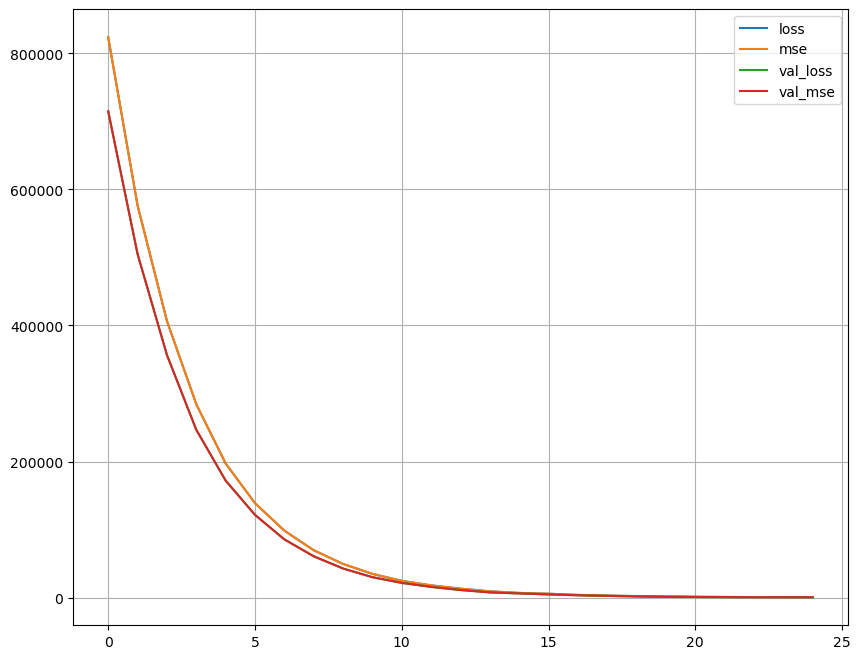

In [34]:
pd.DataFrame(history_y.history).plot(figsize=(10,8))
plt.grid(True)

In [35]:
model_y_scaled.predict(X_xtest)

44/44 [==============================] - 2s 48ms/step


array([[1070.0251 , 1071.6277 , 1074.5297 , 1077.3923 , 1079.2611 ],
       [1239.8567 , 1241.1875 , 1243.7618 , 1246.9824 , 1248.9941 ],
       [1483.4323 , 1485.7579 , 1488.0531 , 1490.2881 , 1492.8002 ],
       ...,
       [1011.84375, 1013.6605 , 1016.6993 , 1019.7757 , 1021.3121 ],
       [1228.3691 , 1229.7405 , 1232.5662 , 1235.5137 , 1237.8563 ],
       [1468.8132 , 1471.4742 , 1473.7916 , 1476.1929 , 1478.8499 ]],
      dtype=float32)

In [36]:
y_ytest

array([[1065.401, 1068.72 , 1072.035, 1075.34 , 1078.643],
       [1240.67 , 1242.67 , 1244.674, 1246.678, 1248.673],
       [1482.324, 1484.899, 1487.462, 1490.011, 1492.549],
       ...,
       [1012.551, 1015.547, 1018.523, 1021.491, 1024.466],
       [1226.385, 1229.495, 1232.635, 1235.812, 1239.032],
       [1469.081, 1472.658, 1476.204, 1479.739, 1483.22 ]])

In [76]:
model_y_gru = keras.models.Sequential([
    keras.layers.GRU(units=1000, input_shape=[62,12]),
    keras.layers.Dense(5, activation='linear')
])
model_y_gru.compile(optimizer=keras.optimizers.Adam(), loss = 'mse', metrics=['mse'])
history_gru= model_y_gru.fit(X_ytrain, y_ytrain, epochs=25 , validation_data=(X_yvalid, y_yvalid))

Epoch 1/25
219/219 [==============================] - 35s 153ms/step - loss: 797628.1250 - mse: 797628.1250 - val_loss: 644736.6875 - val_mse: 644736.6875
Epoch 2/25
219/219 [==============================] - 32s 147ms/step - loss: 525658.8750 - mse: 525658.8750 - val_loss: 425017.8750 - val_mse: 425017.8750
Epoch 3/25
219/219 [==============================] - 32s 146ms/step - loss: 345635.0938 - mse: 345635.0938 - val_loss: 279931.1875 - val_mse: 279931.1875
Epoch 4/25
219/219 [==============================] - 32s 146ms/step - loss: 228530.7812 - mse: 228530.7812 - val_loss: 185408.1719 - val_mse: 185408.1719
Epoch 5/25
219/219 [==============================] - 32s 146ms/step - loss: 151990.2031 - mse: 151990.2031 - val_loss: 123452.5234 - val_mse: 123452.5234
Epoch 6/25
219/219 [==============================] - 32s 147ms/step - loss: 101817.1094 - mse: 101817.1094 - val_loss: 83052.8281 - val_mse: 83052.8281
Epoch 7/25
219/219 [==============================] - 32s 146ms/step - l

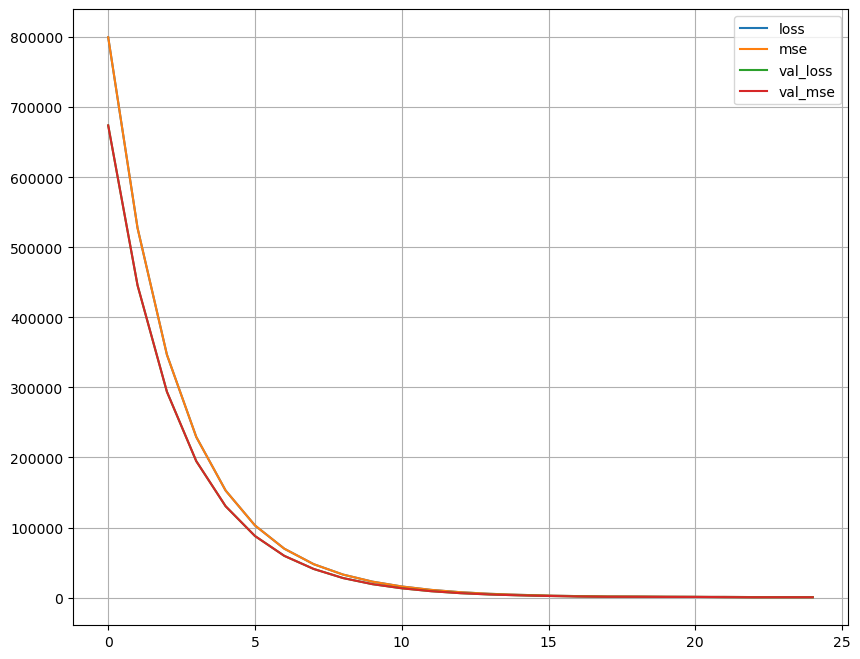

In [38]:
pd.DataFrame(history_gru.history).plot(figsize=(10,8))
plt.grid(True)

In [68]:

model_y_gru1Dconv = keras.models.Sequential([
    keras.layers.Conv1D(filters=10, kernel_size=4, strides=1, padding='valid',input_shape=[62, 12]),
    keras.layers.GRU(units=1000, input_shape=[62, 12]),
    keras.layers.Dense(5, activation='linear')
])
model_y_gru1Dconv.compile(optimizer=keras.optimizers.Adam(), loss='mse', metrics=['mse'])
history_gru1Dconv = model_y_gru1Dconv.fit(X_ytrain, y_ytrain, epochs=25, validation_data=(X_yvalid, y_yvalid))

Epoch 1/25
219/219 [==============================] - 56s 250ms/step - loss: 798774.4375 - mse: 798774.4375 - val_loss: 647560.5625 - val_mse: 647560.5625
Epoch 2/25
219/219 [==============================] - 43s 198ms/step - loss: 531877.0625 - mse: 531877.0625 - val_loss: 435269.4062 - val_mse: 435269.4062
Epoch 3/25
219/219 [==============================] - 44s 199ms/step - loss: 355832.2500 - mse: 355832.2500 - val_loss: 288325.6250 - val_mse: 288325.6250
Epoch 4/25
219/219 [==============================] - 44s 202ms/step - loss: 235282.0000 - mse: 235282.0000 - val_loss: 190442.9844 - val_mse: 190442.9844
Epoch 5/25
219/219 [==============================] - 44s 202ms/step - loss: 156308.1719 - mse: 156308.1719 - val_loss: 127090.8438 - val_mse: 127090.8438
Epoch 6/25
219/219 [==============================] - 44s 202ms/step - loss: 104946.1328 - mse: 104946.1328 - val_loss: 85739.1250 - val_mse: 85739.1250
Epoch 7/25
219/219 [==============================] - 44s 200ms/step - l

## comparison between models

In [82]:
rmse_single_model(model= model_xy, X_test=X_xytest, y_test=y_xytest)

44/44 [==============================] - 2s 49ms/step
root mean squared error x: 5.438675169469103
root mean squared error y: 17.553013490371665
root mean squared error total: 12.993988421423373


In [83]:
rmse_single_model(model= model_xy_gru, X_test=X_xytest, y_test=y_xytest)

44/44 [==============================] - 2s 38ms/step
root mean squared error x: 5.083346983318487
root mean squared error y: 17.017231023059434
root mean squared error total: 12.558394966017545


In [73]:
rmse_double_model(model_x, model_y_gru1Dconv, Xx_test=X_xtest, yx_test=y_xtest,Xy_test=X_ytest, yy_test=y_ytest)

44/44 [==============================] - 2s 35ms/step
root mean squared error x: 0.5516385004046364
root mean squared error y: 25.190340268949537
root mean squared error total: 17.81653091795074


In [77]:
rmse_double_model(model_x, model_y_gru, Xx_test=X_xtest, yx_test=y_xtest,Xy_test=X_ytest, yy_test=y_ytest)

44/44 [==============================] - 2s 37ms/step
root mean squared error x: 0.5516385004046364
root mean squared error y: 25.002306703139492
root mean squared error total: 17.68360321757111


In [86]:
rmse_double_model(model_x, model_y_scaled, Xx_test=X_xtest, yx_test=y_xtest,Xy_test=X_ytest, yy_test=y_ytest)

44/44 [==============================] - 3s 49ms/step
root mean squared error x: 0.5516385004046364
root mean squared error y: 17.077972659651937
root mean squared error total: 12.082248449666722
